In [105]:
import pandas as pd 
import numpy as np 

# getting cleaned NamUs data 
missing_db_1 = pd.read_csv("../created-dbs/prep-final-db.csv")

missing_db_1.head()

,Last Seen,Age,Gender_Female,Gender_Male,Gender_Other,American Indian / Alaska Native,Asian,Black / African American,Hispanic / Latino,Mix / Other / Unknown,...,State_UT,State_VA,State_VI,State_VT,State_WA,State_WI,State_WV,State_WY,Cord_Long,Cord_Lat
0,-1.190250,-1.065312,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,111.0937,34.0489
1,-1.184895,-0.949558,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,119.4179,36.7783
2,-1.184895,0.034352,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,81.5158,27.6648
3,-1.184895,-1.065312,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,81.5158,27.6648
4,-1.184895,2.523065,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,81.5158,27.6648


In [152]:
# last contacted input 
dlc = input("When was the last time you had contact/last seen loved one? MM/DD/YYYY : ")   # dlc = "8/8/1940"
# what age when first missing 
age = input("What is the age of loved one when first missing?: ")   # age = 5 
# # what is gender 
gender = input("What is the gender of loved one: ")   #gender = "Gender_Male"
# # race of loved one 
race = input("What is the race / ethnicity of loved one?: ")   # ethnicity = "Hispanic / Latino"
# # which state last seen input 
state = input("What state was your loved one last seen/known to be in?: ")   # state = "AZ"
# # what city last seen input 
city = input("What city was your loved one last seen/known to be in?: ")   # city = "Phoenix"
# # what county last seen input 
county = input("What county was your loved one last seen/known to be in?: ")   # county = "Maricopa"

In [ ]:
### DLC ### 

In [107]:
from datetime import date 
from sklearn import preprocessing 

def dateToNumerical(caseDate, todayDate): 

    caseMonth = caseDate.split("/")[0]
    caseYear = caseDate.split("/")[1]

    todayMonth = todayDate.split("/")[0]
    todayYear = todayDate.split("/")[1]

    if (caseYear == todayYear): 
        return ((int(todayMonth) - int(caseMonth)) / 12)
    
    else: 
        total = int(todayYear) - int(caseYear)

        if caseMonth >= todayMonth: 
            total = total - 1 
            total = total + ((int(todayMonth) + (12 - int(caseMonth))) / 12)

        else: 
            total = total + ((int(todayMonth) - int(caseMonth)) / 12)

        return total 


# normalize / standardize / more like rest of db 
def dlc_algo(inp): 
    inp = inp.split("/")[0] + "/" + inp.split("/")[2]
    
    today = date.today() 
    currentMY = str(today).split("-")[1] + "/" + str(today).split("-")[0]

    inp = dateToNumerical(inp, currentMY) 

    non_norm_dlc = pd.read_csv("../created-dbs/dlc_non_stan_norm.csv")

    new_row = pd.DataFrame({'DLC': [inp]})

    non_norm_dlc = pd.concat([non_norm_dlc, new_row], ignore_index=True)
    
    # Normalize 
    scaler = preprocessing.MinMaxScaler()
    d = scaler.fit_transform(non_norm_dlc)
    norm_stan_dlc_data = pd.DataFrame(d, columns=non_norm_dlc.columns)

    # Standardize 
    norm_stan_dlc_data['DLC'] = (norm_stan_dlc_data['DLC'] - norm_stan_dlc_data['DLC'].mean()) / norm_stan_dlc_data['DLC'].std() 

    user_input = norm_stan_dlc_data['DLC'].iloc[-1]
    return user_input 

dlc_input = dlc_algo(dlc)

In [108]:
distance_db = pd.DataFrame() 
distance_db["DLC_Euclidean"] = "" 

In [109]:
def getEuclidean(clean_inp, db): 
    new_euclidean_column = pd.DataFrame() 
    new_euclidean_column["dist"] = np.sqrt((db - clean_inp) ** 2)

    return new_euclidean_column

In [110]:
distance_db["DLC_Euclidean"] = getEuclidean(dlc_input, missing_db_1["Last Seen"])

In [111]:
distance_db.head()

,DLC_Euclidean
0,0.032184
1,0.026829
2,0.026829
3,0.026829
4,0.026829


In [ ]:
### Age ### 

In [112]:
# normalize / standardize / more like rest of db 
def age_algo(inp): 
    non_norm_age = pd.read_csv("../created-dbs/age_non_stan_norm.csv")
    new_row = pd.DataFrame({"Missing Age": [inp]})
    non_norm_age = pd.concat([non_norm_age, new_row], ignore_index=True)

    # Normalize 
    scaler = preprocessing.MinMaxScaler()
    d = scaler.fit_transform(non_norm_age)
    norm_stan_age_data = pd.DataFrame(d, columns=non_norm_age.columns)

    # Standardize 
    norm_stan_age_data['Missing Age'] = (norm_stan_age_data['Missing Age'] - norm_stan_age_data['Missing Age'].mean()) / norm_stan_age_data['Missing Age'].std() 

    user_input = norm_stan_age_data["Missing Age"].iloc[-1]

    return user_input 

age_input = age_algo(age)

In [113]:
distance_db["Age_Euclidean"] = getEuclidean(age_input, missing_db_1["Age"])

In [114]:
distance_db.head()

,DLC_Euclidean,Age_Euclidean
0,0.032184,0.347178
1,0.026829,0.462932
2,0.026829,1.446842
3,0.026829,0.347178
4,0.026829,3.935555


In [ ]:
### Gender ### 
### Ethnicity ### 

In [115]:
gender_non_hot_db = missing_db_1[["Gender_Female", "Gender_Male", "Gender_Other"]].idxmax(1)
ethnicity_non_hot_db = missing_db_1[["American Indian / Alaska Native", "Asian", "Black / African American", "Hispanic / Latino", "Mix / Other / Unknown"]].idxmax(1)

arr_gender_ethnicity = pd.DataFrame()
arr_gender_ethnicity["Gender"] = gender_non_hot_db
arr_gender_ethnicity["Ethnicity"] = ethnicity_non_hot_db

arr_gender_ethnicity["Arr"] = arr_gender_ethnicity.apply(lambda row: [row["Gender"], row["Ethnicity"]], axis=1)

arr_gender_ethnicity.head()

,Gender,Ethnicity,Arr
0,Gender_Male,American Indian / Alaska Native,"[Gender_Male, American Indian / Alaska Native]"
1,Gender_Female,Mix / Other / Unknown,"[Gender_Female, Mix / Other / Unknown]"
2,Gender_Male,American Indian / Alaska Native,"[Gender_Male, American Indian / Alaska Native]"
3,Gender_Female,American Indian / Alaska Native,"[Gender_Female, American Indian / Alaska Native]"
4,Gender_Female,American Indian / Alaska Native,"[Gender_Female, American Indian / Alaska Native]"


In [116]:
def jaccard(list1, list2): 
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

def getJaccard(clean_inp, db): 
    new_jaccard_column = pd.DataFrame()
    new_jaccard_column["dist"] = 0
    
    for idx, i in enumerate(db): 
        new_jaccard_column.loc[idx, "dist"] = jaccard(clean_inp, i)

    return new_jaccard_column

In [117]:
distance_db["Sex_Ethnicity_Jaccard"] = getJaccard([gender, race], arr_gender_ethnicity["Arr"])

In [118]:
distance_db.head()

,DLC_Euclidean,Age_Euclidean,Sex_Ethnicity_Jaccard
0,0.032184,0.347178,0.333333
1,0.026829,0.462932,0.000000
2,0.026829,1.446842,0.333333
3,0.026829,0.347178,0.000000
4,0.026829,3.935555,0.000000


In [ ]:
### County ### 
### City ### 

In [119]:
city_county_state_non_hot_db = pd.read_csv("../created-dbs/geo_data_non_encode.csv")

arr_city_county = pd.DataFrame() 
arr_city_county["City"] = city_county_state_non_hot_db["City"]
arr_city_county["County"] = city_county_state_non_hot_db["County"]

arr_city_county["Arr"] = arr_city_county.apply(lambda row: [row["City"], row["County"]], axis=1)

arr_city_county.head()

,City,County,Arr
0,Goodyear,Maricopa,"[Goodyear, Maricopa]"
1,Morgan Hill,Santa Clara,"[Morgan Hill, Santa Clara]"
2,Mulberry,Polk,"[Mulberry, Polk]"
3,Winter Haven,Polk,"[Winter Haven, Polk]"
4,West Palm Beach,Palm Beach,"[West Palm Beach, Palm Beach]"


In [120]:
distance_db["City_County_Jaccard"] = getJaccard([city, county], arr_city_county["Arr"])

In [121]:
distance_db.head()

,DLC_Euclidean,Age_Euclidean,Sex_Ethnicity_Jaccard,City_County_Jaccard
0,0.032184,0.347178,0.333333,0.333333
1,0.026829,0.462932,0.000000,0.000000
2,0.026829,1.446842,0.333333,0.000000
3,0.026829,0.347178,0.000000,0.000000
4,0.026829,3.935555,0.000000,0.000000


In [ ]:
### State ### 

In [122]:
def getStateCoords(state): 
    state_coords = {
        "AZ": [34.0489, 111.0937], 
        "CA": [36.7783, 119.4179], 
        "FL": [27.6648, 81.5158], 
        "AR": [35.2010, 91.8318], 
        "CT": [41.6032, 73.0877], 
        "AL": [32.3182, 86.9023], 
        "CO": [39.5501, 105.7821], 
        "AK": [63.5888, 154.4931], 
        "DE": [38.9108, 75.5277], 
        "DC": [38.9072, 77.0369], 
        "MS": [32.3547, 89.3985], 

        "MI": [44.3148, 85.6024], 
        "OK": [35.0078, 97.0929], 
        "NC": [35.7596, 79.0193], 
        "IL": [40.6331, 89.3985], 
        "PA": [41.2033, 77.1945], 
        "HI": [19.8987, 155.6659], 
        "KY": [37.8393, 84.2700], 
        "SD": [43.9695, 99.9018], 
        "MD": [39.0458,  76.6413], 
        "MT": [46.8797, 110.3626], 
        "GA": [32.1574, 82.9071], 

        "NV": [38.8026, 116.4194], 
        "NJ": [40.0583, 74.4057], 
        "NY": [40.7128, 74.0060], 
        "NM": [34.9727, 105.0324], 
        "MO": [37.9643, 91.8318], 
        "OR": [43.8041, 120.5542], 
        "ND": [47.5515, 101.0020], 
        "LA": [30.5191, 91.5209], 
        "SC": [33.8361, 81.1637], 
        "MA": [42.4072, 71.3824], 
        "NE": [41.4925, 99.9018], 

        'IN': [40.5512, 85.6024], 
        'OH': [40.4173, 82.9071],
        'MN': [46.7296, 94.6859], 
        'KS': [39.0119, 98.4842], 
        'NH': [43.1939, 71.5724], 
        'ME': [45.2538, 69.4455],
        'IA': [41.8780, 93.0977], 
        'ID': [44.0682, 114.7420], 
        'RI': [41.5801, 71.4774], 
        'PR': [18.2208, 66.5901],
        'GU': [13.4443, 144.7937], 

        'MP': [15.0979, 145.6739], 
        'TX': [31.9686, 99.9018], 
        'TN': [35.5175, 86.5804], 
        'UT': [40.7607, 111.8939], 
        'VA': [37.4316, 78.6569], 
        'WI': [43.7844, 88.7879], 
        'WA': [47.7511, 120.7401], 
        'WY': [43.0760, 107.2903], 
        'WV': [38.5976, 80.4549], 
        'VT': [44.5588, 72.5778], 
        'VI': [18.3358, 64.8963], 
    }

    lat = state_coords[state][0]
    lon = state_coords[state][1]
    return lat, lon 

In [123]:
# normalize / standardize / more like rest of db 
state_db = city_county_state_non_hot_db["State"]
state_db.head()

0    AZ
1    CA
2    FL
3    FL
4    FL
Name: State, dtype: object

In [124]:
state_db.isnull().sum()

np.int64(0)

In [125]:
state_coord_db = pd.concat([state_db, missing_db_1["Cord_Long"], missing_db_1["Cord_Lat"]], axis=1)
state_coord_db.head()

,State,Cord_Long,Cord_Lat
0,AZ,111.0937,34.0489
1,CA,119.4179,36.7783
2,FL,81.5158,27.6648
3,FL,81.5158,27.6648
4,FL,81.5158,27.6648


In [126]:
from math import radians, cos, sin, asin, sqrt 

def getHaversine(user_state, db_state): 

    # call function to get coords from state 
    lat1, lon1 = getStateCoords(user_state)
    lat2, lon2 = getStateCoords(db_state)

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = sin(dlat / 2) **2 + cos(lat1) * cos(lat2) * sin(dlon / 2) **2 
    c = 2 * asin(sqrt(a)) 
    r = 3956
    return c * r

In [127]:
distance_db["State_Haversine"] = 0

for idx, i in enumerate(state_db): 
    distance_db.loc[idx, "State_Haversine"] = getHaversine(state, i)

C:\Users\Jason Rubio\AppData\Local\Temp\ipykernel_21600\608286551.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '504.6685507841439' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  distance_db.loc[idx, "State_Haversine"] = getHaversine(state, i)


In [128]:
distance_db

,DLC_Euclidean,Age_Euclidean,Sex_Ethnicity_Jaccard,City_County_Jaccard,State_Haversine
0,0.032184,0.347178,0.333333,0.333333,0.000000
1,0.026829,0.462932,0.000000,0.000000,504.668551
2,0.026829,1.446842,0.333333,0.000000,1800.808539
3,0.026829,0.347178,0.000000,0.000000,1800.808539
4,0.026829,3.935555,0.000000,0.000000,1800.808539
...,...,...,...,...,...
25055,5.001493,0.925948,0.000000,0.000000,465.484832
25056,5.022913,0.810194,0.000000,0.000000,1367.594622
25057,5.365631,0.868071,0.333333,0.000000,465.484832
25058,5.740480,0.578686,0.333333,0.000000,465.484832


In [129]:
distance_db.describe()

,DLC_Euclidean,Age_Euclidean,Sex_Ethnicity_Jaccard,City_County_Jaccard,State_Haversine
count,25060.000000,25060.000000,25060.000000,25060.000000,25060.000000
mean,1.159064,1.439222,0.285901,0.010016,1253.883038
std,0.998843,0.961126,0.274522,0.092660,710.882988
min,0.000054,0.000084,0.000000,0.000000,0.000000
25%,0.289115,0.636563,0.000000,0.000000,663.365698
50%,0.915647,1.273211,0.333333,0.000000,1166.249120
75%,1.879542,2.025612,0.333333,0.000000,1800.808539
max,7.850340,6.134882,1.000000,1.000000,3031.215614


In [130]:
### Normalizing all columns for same range (0 - 1)
## columns needing normalization: DLC, Age, State 
from sklearn import preprocessing

dlc_needing_norm = pd.DataFrame(distance_db["DLC_Euclidean"])
age_needing_norm = pd.DataFrame(distance_db["Age_Euclidean"])
state_needing_norm = pd.DataFrame(distance_db["State_Haversine"])

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(dlc_needing_norm)
norm_dlc_euclidean = pd.DataFrame(d, columns=dlc_needing_norm.columns)

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(age_needing_norm)
norm_age_euclidean = pd.DataFrame(d, columns=age_needing_norm.columns)

scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(state_needing_norm)
norm_state_euclidean = pd.DataFrame(d, columns=state_needing_norm.columns)

In [131]:
norm_dlc_euclidean.describe()

,DLC_Euclidean
count,25060.000000
mean,0.147639
std,0.127236
min,0.000000
25%,0.036822
50%,0.116632
75%,0.239417
max,1.000000


In [132]:
norm_age_euclidean.describe()

,Age_Euclidean
count,25060.000000
mean,0.234586
std,0.156668
min,0.000000
25%,0.103749
50%,0.207525
75%,0.330170
max,1.000000


In [133]:
norm_state_euclidean.describe()

,State_Haversine
count,25060.000000
mean,0.413657
std,0.234521
min,0.000000
25%,0.218845
50%,0.384746
75%,0.594088
max,1.000000


In [134]:
# connecting all columns to get final similarity 
db_for_similarity = pd.concat([norm_dlc_euclidean, norm_age_euclidean, distance_db["Sex_Ethnicity_Jaccard"], distance_db["City_County_Jaccard"], norm_state_euclidean], axis=1)
db_for_similarity.head()

## DLC    1 - similar     0 - no similarity 
## Age    1 - no similarity     0 - similar
## Sex_Ethnicity    1 - similar  0 - no similarity
## City_County    1 - similar    0 - no similarity 
## State      1 - far away     0 - close / similar   

,DLC_Euclidean,Age_Euclidean,Sex_Ethnicity_Jaccard,City_County_Jaccard,State_Haversine
0,0.004093,0.056578,0.333333,0.333333,0.000000
1,0.003411,0.075446,0.000000,0.000000,0.166490
2,0.003411,0.235828,0.333333,0.000000,0.594088
3,0.003411,0.056578,0.000000,0.000000,0.594088
4,0.003411,0.641500,0.000000,0.000000,0.594088


In [135]:
db_for_similarity["Age_Euclidean"] = abs(1 - db_for_similarity["Age_Euclidean"])
db_for_similarity["State_Haversine"] = abs(1 - db_for_similarity["State_Haversine"])

In [136]:
db_for_similarity.head()

,DLC_Euclidean,Age_Euclidean,Sex_Ethnicity_Jaccard,City_County_Jaccard,State_Haversine
0,0.004093,0.943422,0.333333,0.333333,1.000000
1,0.003411,0.924554,0.000000,0.000000,0.833510
2,0.003411,0.764172,0.333333,0.000000,0.405912
3,0.003411,0.943422,0.000000,0.000000,0.405912
4,0.003411,0.358500,0.000000,0.000000,0.405912


In [137]:
len(db_for_similarity)

25060

In [138]:
db_for_similarity["sim_percentage"] = (db_for_similarity["DLC_Euclidean"] * 0.2) + (db_for_similarity["Age_Euclidean"] * 0.2) + (db_for_similarity["Sex_Ethnicity_Jaccard"] * 0.2) + (db_for_similarity["City_County_Jaccard"] * 0.2) + (db_for_similarity["State_Haversine"] * 0.2)
db_for_similarity.head()

,DLC_Euclidean,Age_Euclidean,Sex_Ethnicity_Jaccard,City_County_Jaccard,State_Haversine,sim_percentage
0,0.004093,0.943422,0.333333,0.333333,1.000000,0.522836
1,0.003411,0.924554,0.000000,0.000000,0.833510,0.352295
2,0.003411,0.764172,0.333333,0.000000,0.405912,0.301366
3,0.003411,0.943422,0.000000,0.000000,0.405912,0.270549
4,0.003411,0.358500,0.000000,0.000000,0.405912,0.153565


<Axes: >

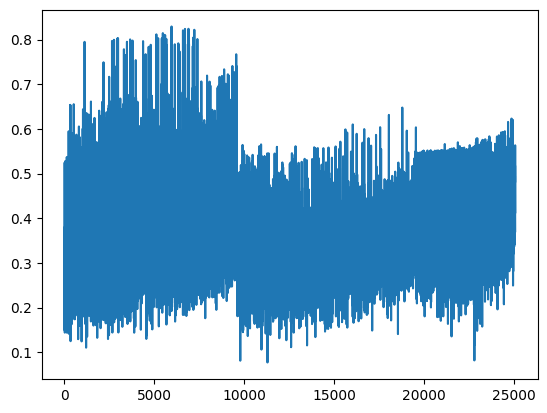

In [139]:
db_for_similarity["sim_percentage"].plot()

In [140]:
def getTopSimilarResults(df): 

    topTen = df.nlargest(10)

    return topTen.index, topTen.values 

sim_arr_idx, sim_arr_vals = getTopSimilarResults(db_for_similarity["sim_percentage"])

In [141]:
sim_arr_idx

Index([5962, 6902, 6709, 7228, 6597, 5478, 5118, 5523, 5605, 7158], dtype='int64')

In [142]:
sim_arr_vals

array([0.8292908 , 0.82415526, 0.82385926, 0.82190541, 0.82060814,
       0.81439948, 0.81166543, 0.8111715 , 0.81010322, 0.80424168])

In [143]:
final_result = pd.DataFrame()

# OG NamUs db 
db1_missing = pd.read_csv("../data/missing-namus-first-pull.csv")
db2_missing = pd.read_csv("../data/missing-namus-second-pull.csv") 
db3_missing = pd.read_csv("../data/missing-namus-third-pull.csv") 
# combining all 3 into one dataframe 
unclean_data = pd.concat([db1_missing, db2_missing, db3_missing], ignore_index=True, sort=False)

for i in sim_arr_idx: 
    final_result = pd.concat([final_result, unclean_data.loc[i]], axis=1)

In [144]:
unclean_data.loc[0]

Case Number                  MP128712
DLC                        09/04/2024
Legal Last Name             Campirano
Legal First Name                Nixon
Missing Age                  16 Years
City                         Goodyear
County                       Maricopa
State                              AZ
Biological Sex                   Male
Race / Ethnicity    White / Caucasian
Date Modified              09/06/2024
Name: 0, dtype: object

In [148]:
final_result = final_result.T 
final_result.head()

,Case Number,DLC,Legal Last Name,Legal First Name,Missing Age,City,County,State,Biological Sex,Race / Ethnicity,Date Modified
5962,MP2276,09/14/2001,Florez,Jesse,14 Years,Phoenix,Maricopa,AZ,Male,Hispanic / Latino,03/25/2024
6902,MP3922,08/19/1995,Ortega,Antonio,22 Years,Phoenix,Maricopa,AZ,Male,Hispanic / Latino,03/25/2024
6709,MP3887,12/12/1996,Lopez,Marco,21 Years,Phoenix,Maricopa,AZ,Male,Hispanic / Latino,03/25/2024
7228,MP1105,07/13/1993,Soriano,Eduardo,25 Years,Phoenix,Maricopa,AZ,Male,Hispanic / Latino,03/25/2024
6597,MP3928,10/10/1997,Rodriguez,Richard,22 Years,Phoenix,Maricopa,AZ,Male,Hispanic / Latino,03/25/2024


In [151]:
for idx, i in enumerate(final_result["Case Number"]): 
    print("Similarity: " + str(round(sim_arr_vals[idx] * 100, 1)) + "%  " + "https://www.namus.gov/MissingPersons/Case#/" + i[2:] + "/contacts")


Similarity: 82.9%  https://www.namus.gov/MissingPersons/Case#/2276/contacts
Similarity: 82.4%  https://www.namus.gov/MissingPersons/Case#/3922/contacts
Similarity: 82.4%  https://www.namus.gov/MissingPersons/Case#/3887/contacts
Similarity: 82.2%  https://www.namus.gov/MissingPersons/Case#/1105/contacts
Similarity: 82.1%  https://www.namus.gov/MissingPersons/Case#/3928/contacts
Similarity: 81.4%  https://www.namus.gov/MissingPersons/Case#/124772/contacts
Similarity: 81.2%  https://www.namus.gov/MissingPersons/Case#/20521/contacts
Similarity: 81.1%  https://www.namus.gov/MissingPersons/Case#/524/contacts
Similarity: 81.0%  https://www.namus.gov/MissingPersons/Case#/3863/contacts
Similarity: 80.4%  https://www.namus.gov/MissingPersons/Case#/1064/contacts
